<a href="https://colab.research.google.com/github/CarlosLHP/Data-Science-/blob/main/introducao_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

instalando bibliotecas atualizadas

In [1]:
!pip install pandas

In [2]:
!pip install seaborn

In [3]:
!pip install matplotlib

# Analisando as notas em geral

In [4]:
import pandas as pd

In [5]:
notas = pd.read_csv("ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
notas.columns = ["Usuario ID", "FilmeID", "Nota", "Momento"]
notas.head()

,Usuario ID,FilmeID,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
notas["Nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: Nota, Length: 100836, dtype: float64

In [8]:
notas['Nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: Nota, dtype: int64

In [9]:
notas['Nota'].mean()

3.501556983616962

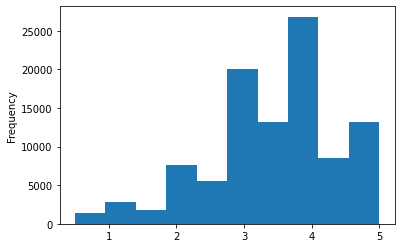

In [10]:
notas.Nota.plot(kind='hist')

In [11]:
notas.Nota.median()

3.5

In [12]:
notas.Nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


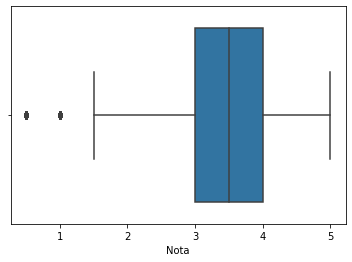

In [13]:
import seaborn as sns

sns.boxplot(notas.Nota)

In [14]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeID', 'titulo', 'genero']
filmes.head()

,filmeID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando notas especificas por filmes

In [15]:
notas.query("FilmeID==1").Nota.mean()

3.9209302325581397

In [16]:
media_por_filme = notas.groupby("FilmeID").mean()["Nota"]

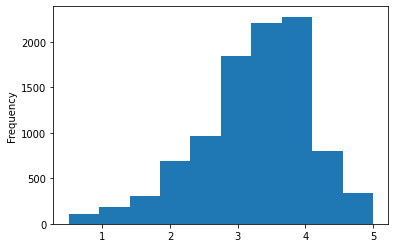

In [17]:
media_por_filme.plot(kind="hist")

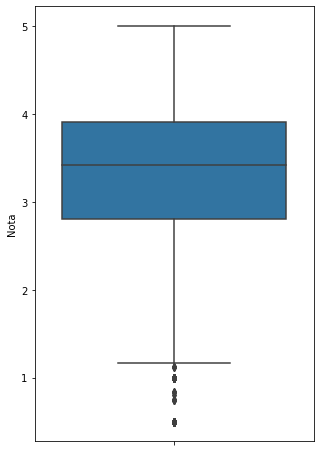

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=media_por_filme)

In [19]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: Nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


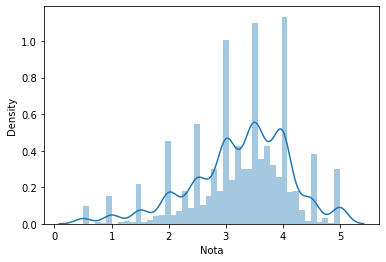

In [20]:
sns.distplot(media_por_filme) 

Text(0.5, 1.0, 'Histograma das médias dos filme.')

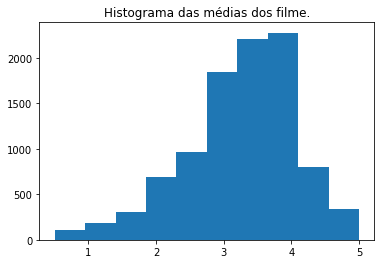

In [21]:
plt.hist(media_por_filme)
plt.title("Histograma das médias dos filme.")

In [22]:
filmes2 = pd.read_csv("tmdb_5000_movies.csv")
filmes2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [23]:
filmes2.original_language.unique() # categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [24]:
contagem_de_linguas = filmes2["original_language"].value_counts().to_frame().reset_index() 
# to_frame para transforma em coluna
# reset_index para adicionar um contador 
contagem_de_linguas.columns = ["original_language", "total"]
contagem_de_linguas.head(10)

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ko,11


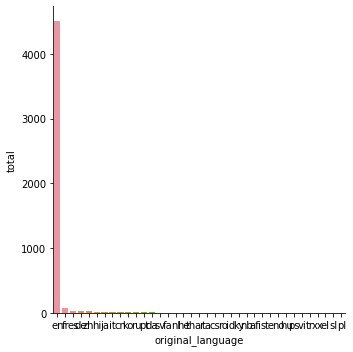

In [25]:
sns.catplot(x="original_language", y="total", kind="bar", data=contagem_de_linguas)

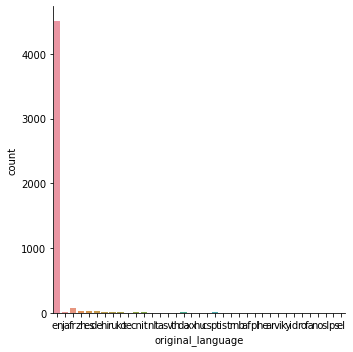

In [26]:
sns.catplot(x="original_language", kind="count", data=filmes2)

([<matplotlib.patches.Wedge at 0x7f92d61c4d10>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

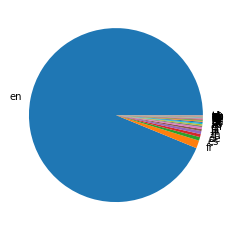

In [27]:
plt.pie(contagem_de_linguas["total"], labels=contagem_de_linguas["original_language"])

In [28]:
total_por_lingua = filmes2['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_ingles= total_por_lingua.loc['en']
total_resto = total_geral - total_ingles

In [29]:
dados =  {
    'lingua' : ['inglesa', 'outros'],
    'total' : [total_ingles, total_resto]
}
dados

{'lingua': ['inglesa', 'outros'], 'total': [4505, 298]}

In [30]:
dados = pd.DataFrame(dados)

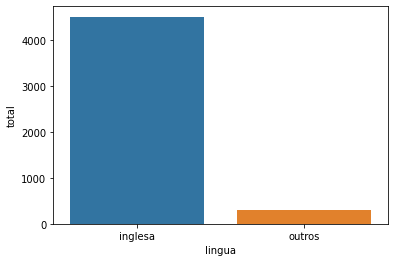

In [31]:
sns.barplot(x='lingua', y='total', data=dados)

([<matplotlib.patches.Wedge at 0x7f92d605b650>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'inglesa'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

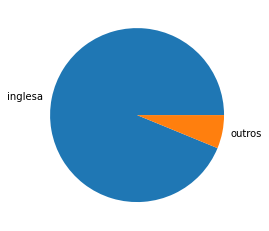

In [32]:
plt.pie(dados["total"], labels=dados["lingua"])

In [51]:
total_outras_linguas = filmes2.query("original_language != 'en' ")
total_outras_linguas_ordenada = filmes2.query("original_language != 'en' ").original_language.value_counts()
total_outras_linguas.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9


<Figure size 360x720 with 0 Axes>

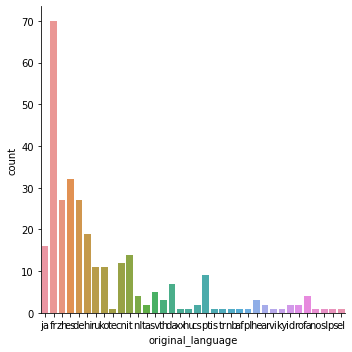

In [34]:
plt.figure(figsize=(5,10))
sns.catplot(x = "original_language", kind="count", 
            data = total_outras_linguas
            )

Depois da modificação

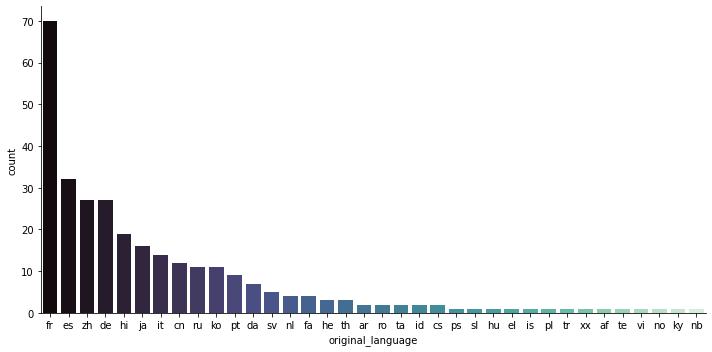

In [35]:
sns.catplot(x = "original_language", kind="count", 
            data = total_outras_linguas,
            aspect = 2,
            palette = "mako",
            order = total_outras_linguas_ordenada.index
            )

# Revisando o papel da média, mediana, medidas de tendência central, dirpersão, boxplot e histograma

In [36]:
filmes = pd.read_csv('movies.csv')
filmes.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [37]:
notas_toy_story = notas.query("FilmeID==1")
notas_jumanji = notas.query("FilmeID==2")
print(f'nota Toy Story {len(notas_toy_story)}')
print(f'nota Jumanji {len(notas_jumanji)}')

nota Toy Story 215
nota Jumanji 110


In [38]:
print(f'Média Toy Story: {notas_toy_story.Nota.mean():.2f}')
print(f'Média Jumanji: {notas_toy_story.Nota.mean():.2f}')

Média Toy Story: 3.92
Média Jumanji: 3.92


In [39]:
print(f'Mediana Toy Story: {notas_toy_story.Nota.median():.2f}')
print(f'Mediana Jumanji: {notas_toy_story.Nota.median():.2f}')

Mediana Toy Story: 4.00
Mediana Jumanji: 4.00


In [40]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))

filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [52]:
filme1.mean(),filme2.mean() # Média dos Filmes

(3.0, 3.0)

In [42]:
np.median(filme1), np.median(filme2) # Mediana dos Filmes

(3.0, 3.0)

In [43]:

np.std(filme1), np.std(filme2) # Desvio Padrão dos Filmes

(0.5, 2.0)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

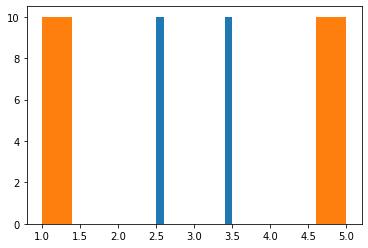

In [44]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f92d5bf3cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f92d5bfacd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f92d5c02d10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f92d5c027d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f92d5bfa250>,
  <matplotlib.lines.Line2D at 0x7f92d5c0bd10>]}

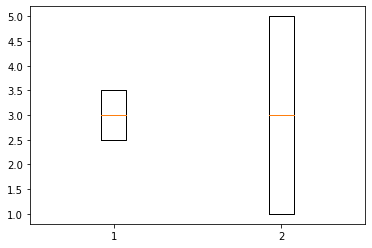

In [45]:
plt.boxplot([filme1, filme2])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


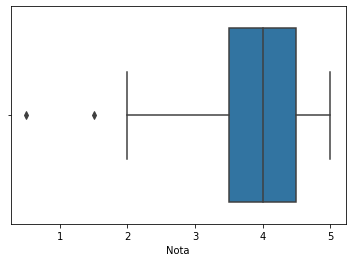

In [46]:
sns.boxplot(notas_toy_story.Nota)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


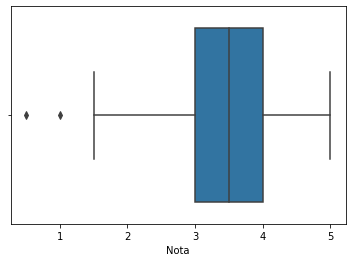

In [47]:
sns.boxplot(notas_jumanji.Nota)

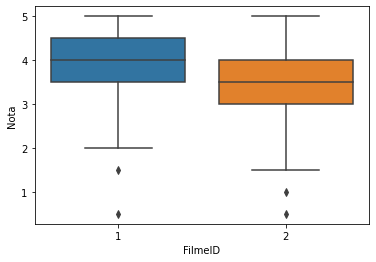

In [48]:
sns.boxplot(x="FilmeID", y="Nota", data=notas.query("FilmeID in [1,2]"))

In [49]:
notas_jumanji.Nota.std() # Desvio Padrão de Jumanji

0.8817134921476455

In [50]:
 notas_toy_story.Nota.std() # Desvio Padrão de Toy Story

0.8348591407114045